In [12]:
#Project: 210 Capstone
#Author: Alexandre C. Baude
#Data: 06/09/2022

#Import Block
import os 
import pandas as pd
import copy
import regex as re
from collections import Counter
import enchant
import matplotlib.pyplot as plt 

#Grabbing files
files = []  
file_name = []
path = r'C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data'  #CHANGE FOR YOUR FILEPATH

with os.scandir(path) as entries:
    for entry in entries:
        files.append(entry.name)

for i in range(0, len(files)):  
    file_name.append(files[i])
    files[i] = path + "/" + files[i]

print(f'There are {len(files)} file(s) in the sub-folder.')

There are 3 file(s) in the sub-folder.


In [13]:
streamer_df = pd.DataFrame

for i in range(len(files)): #For every file:
   # print(files[i])
    pof = files[i] #Grab the path of the file
    print(pof) #Print to double check
    csv = pd.read_csv(pof) 
    
    
    if i == 0: 
        streamer_df = copy.deepcopy(csv) #if looking at the first file, just make it the baseline
    else:
        streamer_df = streamer_df.append(csv, ignore_index=True) #otherwise, append (union) the next log to the bottom
    
    print("The current size of the Streamer Union is:", streamer_df.shape)

streamer_df #Unionized Version of the files

#streamer_df.to_csv('streamer_data.csv')      #Code to save the output as a .csv



C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/cloakzy1.csv
The current size of the Streamer Union is: (182, 9)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/dippedinpoison1.csv
The current size of the Streamer Union is: (783, 9)
C:\Users\alebo\Desktop\Berkeley\210\Data\Streamer_Data/sypherPK1.csv
The current size of the Streamer Union is: (1082, 9)


,text,username,timestamp,message_id,channel_id,stream_id,unique_id,sentiment_a,sentiment_g
0,I got sick in December and am only just now fu...,spooomm,"2022-06-09 15:56:52,388",1,A,1,1A1,NaN,-1.0
1,!rp,socio1319,"2022-06-09 15:56:52,527",2,A,1,2A1,NaN,0.0
2,"= RP Stats = | Current Amount: 14,956 RP || 32...",nightbot,"2022-06-09 15:56:54,741",3,A,1,3A1,NaN,NaN
3,@Pr11me_ You buy i eat,tjgruehs,"2022-06-09 15:56:58,572",4,A,1,4A1,NaN,0.0
4,how many days are you staying in the hospital ...,i7amanyq8,"2022-06-09 15:57:02,695",5,A,1,5A1,NaN,0.0
...,...,...,...,...,...,...,...,...,...
1077,GO PEAKAY,agoodsadness_,"2022-06-10 17:59:34,651",295,C,1,295C1,NaN,1.0
1078,ninjaPog ranLove ranLove ranLove ranLove,peechiee,"2022-06-10 17:59:35,030",296,C,1,296C1,NaN,1.0
1079,getting hulu rn PogU,grrimmmy,"2022-06-10 17:59:35,697",297,C,1,297C1,NaN,1.0
1080,yooo about 1 more hour until i get 2 mythics f...,benssy135,"2022-06-10 17:59:35,881",298,C,1,298C1,NaN,1.0


In [14]:
def tokenize(row):
    '''
    Function to tokenize the text messages
    '''
    s = row['text'] #grabbing the text
    s = re.sub("[^\w\s]", "", s) #removing punctuation
    l = s.lower().split() #tokenizing and lowering
    return l

streamer_df['Tokens'] = streamer_df.apply(tokenize, axis = 1) #applying the function
streamer_df
    

,text,username,timestamp,message_id,channel_id,stream_id,unique_id,sentiment_a,sentiment_g,Tokens
0,I got sick in December and am only just now fu...,spooomm,"2022-06-09 15:56:52,388",1,A,1,1A1,NaN,-1.0,"[i, got, sick, in, december, and, am, only, ju..."
1,!rp,socio1319,"2022-06-09 15:56:52,527",2,A,1,2A1,NaN,0.0,[rp]
2,"= RP Stats = | Current Amount: 14,956 RP || 32...",nightbot,"2022-06-09 15:56:54,741",3,A,1,3A1,NaN,NaN,"[rp, stats, current, amount, 14956, rp, 323, r..."
3,@Pr11me_ You buy i eat,tjgruehs,"2022-06-09 15:56:58,572",4,A,1,4A1,NaN,0.0,"[pr11me_, you, buy, i, eat]"
4,how many days are you staying in the hospital ...,i7amanyq8,"2022-06-09 15:57:02,695",5,A,1,5A1,NaN,0.0,"[how, many, days, are, you, staying, in, the, ..."
...,...,...,...,...,...,...,...,...,...,...
1077,GO PEAKAY,agoodsadness_,"2022-06-10 17:59:34,651",295,C,1,295C1,NaN,1.0,"[go, peakay]"
1078,ninjaPog ranLove ranLove ranLove ranLove,peechiee,"2022-06-10 17:59:35,030",296,C,1,296C1,NaN,1.0,"[ninjapog, ranlove, ranlove, ranlove, ranlove]"
1079,getting hulu rn PogU,grrimmmy,"2022-06-10 17:59:35,697",297,C,1,297C1,NaN,1.0,"[getting, hulu, rn, pogu]"
1080,yooo about 1 more hour until i get 2 mythics f...,benssy135,"2022-06-10 17:59:35,881",298,C,1,298C1,NaN,1.0,"[yooo, about, 1, more, hour, until, i, get, 2,..."


In [15]:
#EDA
tokens = streamer_df['Tokens'] #list of messages tokenized (split) 
all_tokens = tokens.sum() #list of all messages together
eng_dict = enchant.Dict("en_US") #US Dict
cnt_all = Counter() #Counter for all words
real_word_cnt = Counter() #Counter for real words
fake_word_cnt = Counter() #Counter for fake words (meme words?)

for text in all_tokens: #for every word in the messages
    cnt_all[text] += 1 #for 

    if eng_dict.check(text): 
        real_word_cnt[text] += 1
    else:
        fake_word_cnt[text] += 1


word_freq_all = pd.DataFrame(cnt_all.most_common(1883), columns=['words', 'count'])
word_freq_real = pd.DataFrame(real_word_cnt.most_common(1250), columns=['words', 'count'])
word_freq_fake = pd.DataFrame(fake_word_cnt.most_common(633), columns=['words', 'count'])

word_freq_all_top_30 = pd.DataFrame(cnt_all.most_common(30), columns=['words', 'count'])
word_freq_real_top_30 = pd.DataFrame(real_word_cnt.most_common(30), columns=['words', 'count'])
word_freq_fake_top_30 = pd.DataFrame(fake_word_cnt.most_common(30), columns=['words', 'count'])



In [16]:
#Top 5 for each table
print(word_freq_all.head(5), '\n')
print(word_freq_fake.head(5), '\n')
print(word_freq_real.head(5), '\n')

  words  count
0   the    154
1     i    133
2   you    112
3     a     98
4    is     76 

         words  count
0   petthemods     54
1   mecharobot     50
2          lul     36
3  cloakpotato     33
4          lol     31 

  words  count
0   the    154
1     i    133
2   you    112
3     a     98
4    is     76 



<AxesSubplot:title={'center':'Word Frequency for Fake words'}, xlabel='Words', ylabel='Counts'>

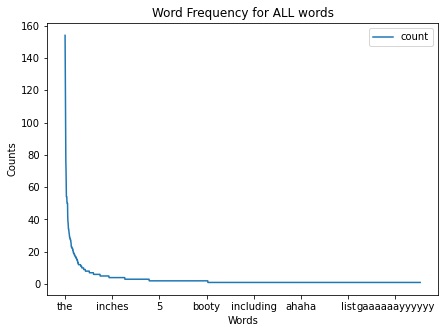

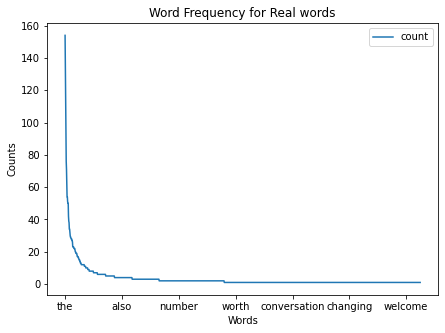

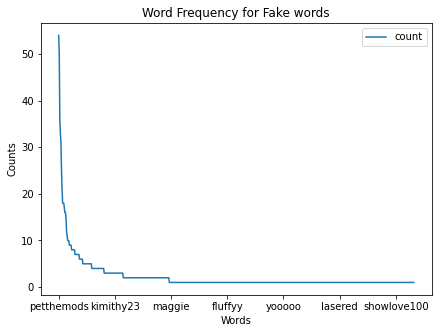

In [17]:
#Frequency Graphs & Tables

word_freq_all.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for ALL words', figsize = (7, 5))
word_freq_real.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Real words', figsize = (7, 5))
word_freq_fake.plot(x= 'words', y = 'count', kind = 'line', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Fake words', figsize = (7, 5))

#####
Not very helpful... Try to look at top 30

<AxesSubplot:title={'center':'Word Frequency for Fake words Top 30'}, xlabel='Words', ylabel='Counts'>

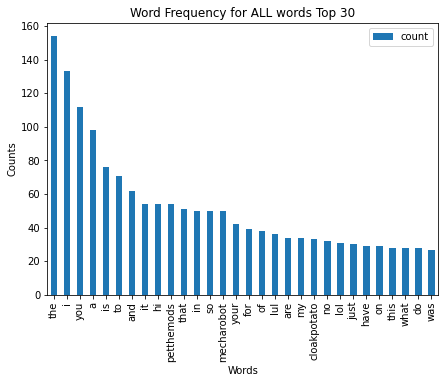

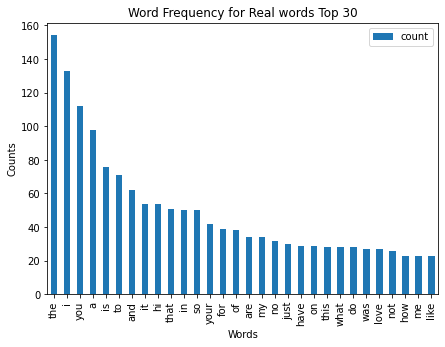

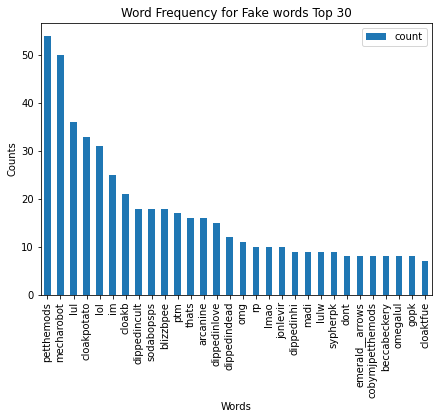

In [18]:
#Frequency top 30 

word_freq_all_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for ALL words Top 30', figsize = (7, 5))
word_freq_real_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Real words Top 30', figsize = (7, 5))
word_freq_fake_top_30.plot(x= 'words', y = 'count', kind = 'bar', xlabel = 'Words', ylabel = 'Counts', title = 'Word Frequency for Fake words Top 30', figsize = (7, 5))


In [19]:
#Real vs Fake
print(f"For a total number of {word_freq_all['count'].sum()} words...\nThe number of real words is: {word_freq_real['count'].sum()} or {(word_freq_real['count'].sum()/word_freq_all['count'].sum()) * 100}%\nThe number of fake words is: {word_freq_fake['count'].sum()} or {(word_freq_fake['count'].sum()/word_freq_all['count'].sum())}%")

print(f"The average length of a message across all streams is: {(tokens.str.len()).mean()}")

For a total number of 5980 words...
The number of real words is: 4513 or 75.46822742474917%
The number of fake words is: 1467 or 0.24531772575250835%
The average length of a message across all streams is: 5.526802218114603
